# １章 ウェブの注文数を分析する１０本ノック

ここでは、ある企業のECサイトでの商品の注文数の推移を分析していきます。  
データの属性を理解し、分析をするためにデータを加工した後、  
データの可視化を行うことで問題を発見していくプロセスを学びます。

### ノック１：データを読み込んでみよう

In [1]:
!ls


 1_answer.ipynb					    transaction_1.csv
'１章 ウェブの注文数を分析する１０本ノック.ipynb'   transaction_2.csv
 customer_master.csv				    transaction_detail_1.csv
 item_master.csv				    transaction_detail_2.csv


In [3]:
import pandas as pd
df_customer = pd.read_csv("customer_master.csv")
df_customer.head()

,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,IK152942,平田 裕次郎,2019-01-01 00:25:33,ひらた ゆうじろう,hirata_yuujirou@example.com,M,29,1990/6/10,石川県
1,TS808488,田村 詩織,2019-01-01 01:13:45,たむら しおり,tamura_shiori@example.com,F,33,1986/5/20,東京都
2,AS834628,久野 由樹,2019-01-01 02:00:14,ひさの ゆき,hisano_yuki@example.com,F,63,1956/1/2,茨城県
3,AS345469,鶴岡 薫,2019-01-01 04:48:22,つるおか かおる,tsuruoka_kaoru@example.com,M,74,1945/3/25,東京都
4,GD892565,大内 高史,2019-01-01 04:54:51,おおうち たかし,oouchi_takashi@example.com,M,54,1965/8/5,千葉県


In [27]:
df_item_master = pd.read_csv("item_master.csv")
df_item_master

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


### ノック２：データを結合(ユニオン)してみよう

In [11]:
df_trans1 = pd.read_csv("./transaction_1.csv")
df_trans1.head(), df_trans1.count()

(  transaction_id   price         payment_date customer_id
 0    T0000000113  210000  2019-02-01 01:36:57    PL563502
 1    T0000000114   50000  2019-02-01 01:37:23    HD678019
 2    T0000000115  120000  2019-02-01 02:34:19    HD298120
 3    T0000000116  210000  2019-02-01 02:47:23    IK452215
 4    T0000000117  170000  2019-02-01 04:33:46    PL542865,
 transaction_id    5000
 price             5000
 payment_date      5000
 customer_id       5000
 dtype: int64)

In [12]:
df_trans2 = pd.read_csv("./transaction_2.csv")
df_trans2.head(), df_trans2.count()

(  transaction_id   price         payment_date customer_id
 0    T0000005113  295000  2019-06-15 07:20:27    TS169261
 1    T0000005114   50000  2019-06-15 07:35:47    HI599892
 2    T0000005115   85000  2019-06-15 07:56:36    HI421757
 3    T0000005116   50000  2019-06-15 08:40:55    OA386378
 4    T0000005117  120000  2019-06-15 08:44:23    TS506913,
 transaction_id    1786
 price             1786
 payment_date      1786
 customer_id       1786
 dtype: int64)

In [16]:
df_transaction_all = pd.concat([df_trans1, df_trans2])
df_transaction_all.count()

transaction_id    6786
price             6786
payment_date      6786
customer_id       6786
dtype: int64

### ノック３：売上データ同士を結合(ジョイン)してみよう

In [18]:
df_trans_detail1 = pd.read_csv("transaction_detail_1.csv")
df_trans_detail2 = pd.read_csv("transaction_detail_2.csv")
df_detail_all = pd.concat([df_trans_detail1,df_trans_detail2])


In [23]:
df_detail_all.head(),df_transaction_all.head()

(   detail_id transaction_id item_id  quantity
 0          0    T0000000113    S005         1
 1          1    T0000000114    S001         1
 2          2    T0000000115    S003         1
 3          3    T0000000116    S005         1
 4          4    T0000000117    S002         2,
   transaction_id   price         payment_date customer_id
 0    T0000000113  210000  2019-02-01 01:36:57    PL563502
 1    T0000000114   50000  2019-02-01 01:37:23    HD678019
 2    T0000000115  120000  2019-02-01 02:34:19    HD298120
 3    T0000000116  210000  2019-02-01 02:47:23    IK452215
 4    T0000000117  170000  2019-02-01 04:33:46    PL542865)

In [24]:
df_sales_detail = df_detail_all.merge(df_transaction_all, on="transaction_id",)
df_sales_detail

,detail_id,transaction_id,item_id,quantity,price,payment_date,customer_id
0,0,T0000000113,S005,1,210000,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,50000,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,120000,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,210000,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,170000,2019-02-01 04:33:46,PL542865
...,...,...,...,...,...,...,...
7139,7139,T0000006894,S004,1,180000,2019-07-31 21:20:44,HI400734
7140,7140,T0000006895,S002,1,85000,2019-07-31 21:52:48,AS339451
7141,7141,T0000006896,S001,2,100000,2019-07-31 23:35:25,OA027325
7142,7142,T0000006897,S002,1,85000,2019-07-31 23:39:35,TS624738


### ノック４：マスタデータを結合(ジョイン)してみよう

In [28]:
df_sales_detail = df_sales_detail.merge(df_customer, on="customer_id", how="left")
df_sales_detail = df_sales_detail.merge(df_item_master, on="item_id", how="left")
df_sales_detail.head()




,detail_id,transaction_id,item_id,quantity,price,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,210000,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000
1,1,T0000000114,S001,1,50000,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000
2,2,T0000000115,S003,1,120000,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000
3,3,T0000000116,S005,1,210000,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000
4,4,T0000000117,S002,2,170000,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県,PC-B,85000


### ノック5：必要なデータ列を作ろう

In [31]:
df_sales_detail1 = df_sales_detail.copy()
df_sales_detail1["sales"] = df_sales_detail1["item_price"] * df_sales_detail1["quantity"]
df_sales_detail1.head()

,detail_id,transaction_id,item_id,quantity,price,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price,sales
0,0,T0000000113,S005,1,210000,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000,210000
1,1,T0000000114,S001,1,50000,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000,50000
2,2,T0000000115,S003,1,120000,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000,120000
3,3,T0000000116,S005,1,210000,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000,210000
4,4,T0000000117,S002,2,170000,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県,PC-B,85000,170000


### ノック6：データ検算をしよう

In [34]:
df_transaction_all["price"].sum(), df_sales_detail1["sales"].sum()

(971135000, 971135000)

### ノック7：各種統計量を把握しよう

In [40]:
df_sales_detail1.describe()

,detail_id,quantity,price,age,item_price,sales
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,150440.929451,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,85991.561558,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,50000.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,85000.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,135000.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,210000.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,750000.000000,80.000000,210000.000000,420000.000000


### ノック8：月別でデータを集計してみよう

In [45]:
df_sales_detail1["payment_date"] = pd.to_datetime(df_sales_detail1["payment_date"])


In [46]:
df_sales_detail1.set_index("payment_date", inplace=True)

In [50]:
df_sales_detail1.resample("M")["sales"].sum()

payment_date
2019-02-28    160185000
2019-03-31    160370000
2019-04-30    160510000
2019-05-31    155420000
2019-06-30    164030000
2019-07-31    170620000
Freq: M, Name: sales, dtype: int64

### ノック9：月別、商品別でデータを集計してみよう

In [53]:
df_sales_detail1["month"] = df_sales_detail1.index.strftime("%Y%m")

In [61]:
df_sales_detail1.groupby(["month", "item_name"]).sum()[["sales", "quantity"]]

sales  quantity
month  item_name                    
201902 PC-A       24150000       483
       PC-B       25245000       297
       PC-C       19800000       165
       PC-D       31140000       173
       PC-E       59850000       285
201903 PC-A       26000000       520
       PC-B       25500000       300
       PC-C       19080000       159
       PC-D       25740000       143
       PC-E       64050000       305
201904 PC-A       25900000       518
       PC-B       23460000       276
       PC-C       21960000       183
       PC-D       24300000       135
       PC-E       64890000       309
201905 PC-A       24850000       497
       PC-B       25330000       298
       PC-C       20520000       171
       PC-D       25920000       144
       PC-E       58800000       280
201906 PC-A       26000000       520
       PC-B       23970000       282
       PC-C       21840000       182
       PC-D       28800000       160
       PC-E       63420000       302
201907 PC-A       25250000       505
       PC-B       28220000       332
       PC-C       19440000       162
       PC-D       26100000       145
       PC-E       71610000       341

### ノック10：商品別の売上推移を可視化してみよう

<AxesSubplot:xlabel='month'>

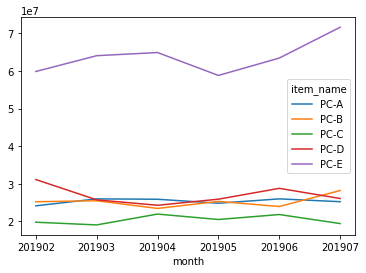

In [75]:
df_sales_detail1.groupby(["month", "item_name"]).sum()["sales"].unstack().plot()